#**1.Podsumowanie 1 Zadania ML:**
1.Bezużyteczne:
 -Kolumny: Name, Parch i SibSp(Które zostały zamienione na FamilySize),Embarked, PassengerID oraz Ticket(zamieinone na level po literze decku).
 -Niektóre wykresy: typu age vs survived.  

2.Użyteczne:

-Pozostałe bądź nowo stworzone kolumny, nowych recenzentów zachęcam do zobaczenia 1 Zadania, lecz tutaj w dole specjalnie udostępniam heada.  
-Macierz zależności:zawsze dużo wnosi i mozna obejrzeć relacje
-Doświadczenie z wizualizacji danych

In [32]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
from pathlib import Path
base_path = Path('/content/drive/MyDrive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(Jak coś mam tyle bibliotek bo się bawiłem trochę)

In [33]:
df=pd.read_csv('/content/drive/MyDrive/titanic_clean.csv')


X = df.drop(columns=['Survived'])
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (712, 7)
Test shape: (179, 7)


In [34]:
model=DummyClassifier(strategy='uniform')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

print("Accurancy dla danych test:",accuracy_score(y_test,y_pred))
print("Accurancy dla danych train:",accuracy_score(y_train,y_train_pred))
print(classification_report(y_test,y_pred))

Accurancy dla danych test: 0.5195530726256983
Accurancy dla danych train: 0.4901685393258427
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       110
           1       0.40      0.48      0.43        69

    accuracy                           0.52       179
   macro avg       0.51      0.51      0.51       179
weighted avg       0.54      0.52      0.53       179



In [35]:
model= RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_pred=model.predict(X_test)
print("Accurancy dla danych test:",accuracy_score(y_test,y_pred))
print("Accurancy dla danych train:",accuracy_score(y_train,y_train_pred))
print(classification_report(y_test,y_pred))

Accurancy dla danych test: 0.7877094972067039
Accurancy dla danych train: 0.8679775280898876
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



In [36]:
model= DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_pred=model.predict(X_test)
print("Accurancy dla danych test:",accuracy_score(y_test,y_pred))
print("Accurancy dla danych train",accuracy_score(y_train,y_train_pred))
print(classification_report(y_test,y_pred))

Accurancy dla danych test: 0.8044692737430168
Accurancy dla danych train 0.8286516853932584
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



#Wnioski z testu modeli:
Po wytrenowaniu dwóch modeli  i porównaniu ich z dummyclassifier mozna zauważyć, że są od niego efektywniejsze, co jest jak najbardziej dobrym znakiem, że nie ma z nimi żadnych problemów. Najlepiej radzi sobie  drzewo decyzjne 80%, lecz RandomForestClassifier nie było wcale gorsze z wynikiem 79%.Jednym z pytań które recenzent może zadać to po co w każdym modelu sprawdzać accurancy dla test i train, w ten sposób sprawdzamy przetrenowanie modelu, i jeśli równiża jest >0.1, to lekko mówiać jest źle
#Wybrane metryki
Accurancy, jak mozna się spodziewać mierzy dokładność modelu(odsetek poprawnych przewidywań), Precision sprawdza ilu faktycznie przeżyło bądź umarło z predykowanych do danego stanu, recall z ludzi z danym stanem ilu dokładnie model znalazł i f1-score średnia harmoniczna z precision i recall.

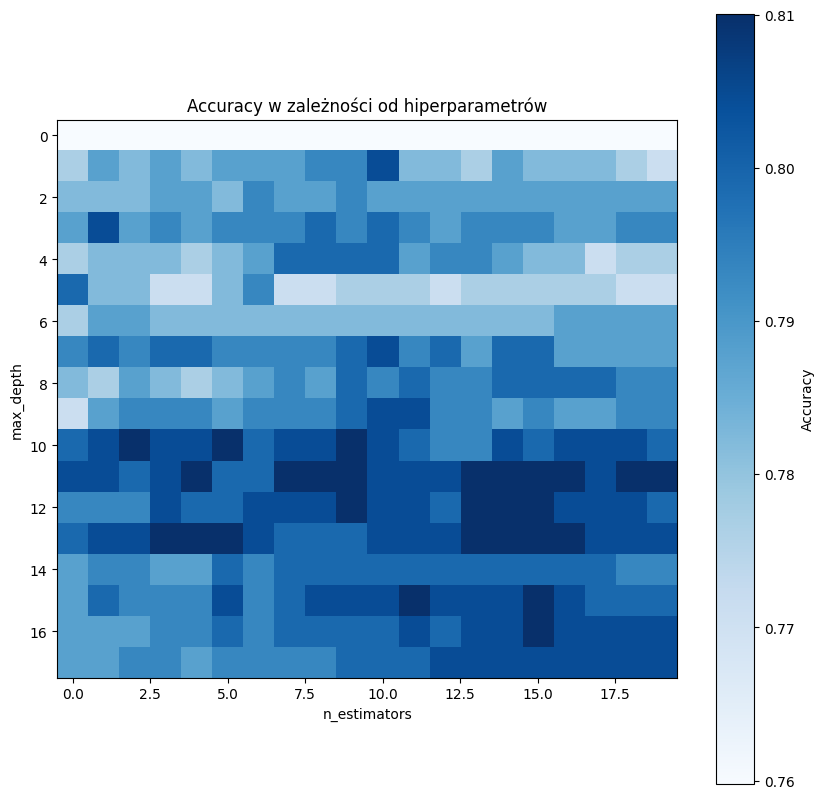

In [56]:
ax_depth_value = range(2, 20)
n_estimators_value = range(50,150,5)
results = []
for depth in max_depth_value:
    for n_estimators in n_estimators_value:
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_estimators, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1=f1_score(y_test,y_pred)
        results.append((depth, n_estimators, f1, accuracy))
df_results=pd.DataFrame(results, columns=["max_depth", "n_estimators", "f1-score", "accuracy"])
wykres_acc=df_results.pivot(index="max_depth", columns="n_estimators", values="accuracy")
figure = plt.figure(figsize=(10,10))
plt.imshow(wykres_acc, cmap="Blues", interpolation="nearest")
cbar=plt.colorbar()
cbar.set_label("Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("Accuracy w zależności od hiperparametrów")
plt.show()

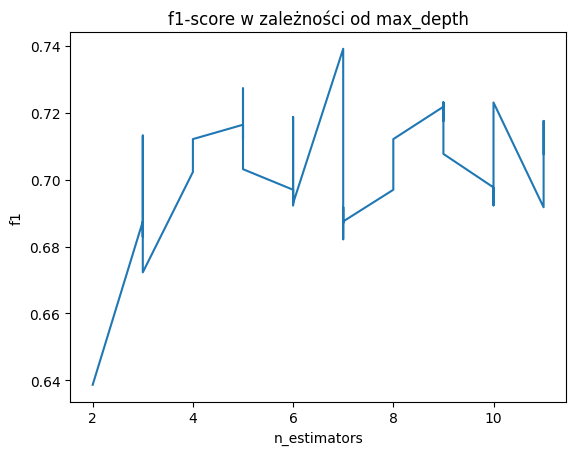

In [37]:
max_depth_value = range(2, 20)
n_estimators_value = range(50,150,20)
results = []
for depth in max_depth_value:
    for n_estimators in n_estimators_value:
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_estimators, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1=f1_score(y_test,y_pred)
        results.append((depth, n_estimators, f1, accuracy))
df=pd.DataFrame(results, columns=["max_depth", "n_estimators", "f1-score", "accuracy"])
wykres_f1=plt.plot(df['max_depth'],df['f1-score'])
cbar=plt.colorbar()

plt.ylabel('f1')
plt.title('f1-score w zależności od max_depth')
plt.show()

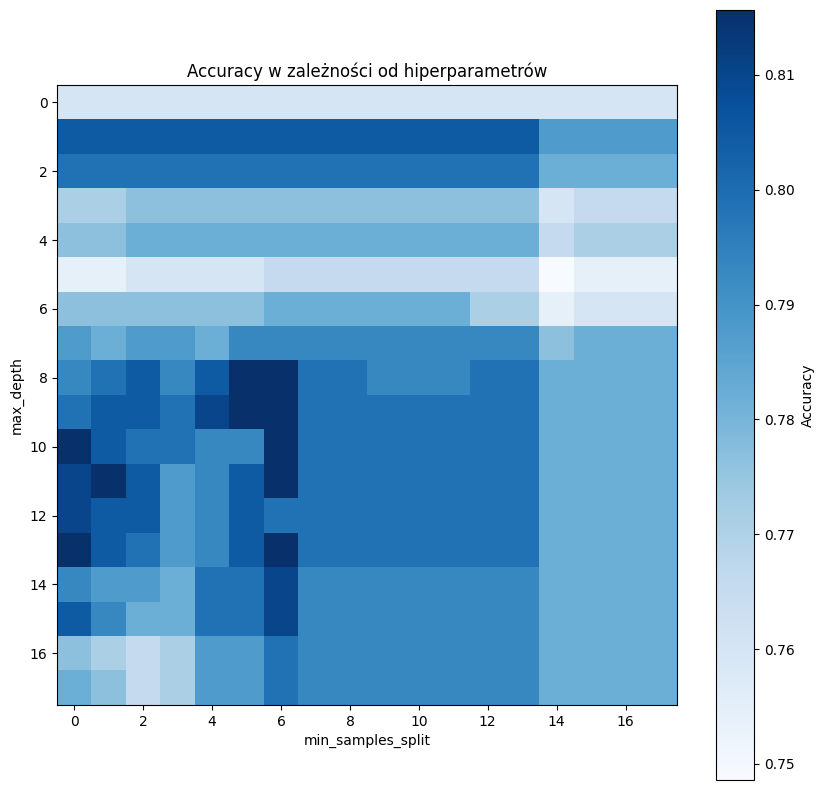

In [54]:
max_depth_value = range(2,20)
min_samples_split_value = range(2, 20)
results1 = []

for depth in max_depth_value:
    for split in min_samples_split_value:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred)

        results1.append((depth, split, pre, accuracy))

df_results = pd.DataFrame(results1, columns=["max_depth", "min_samples_split", "precision", "accuracy"])

wykres_acc = df_results.pivot(index="max_depth", columns="min_samples_split", values="accuracy")

figure = plt.figure(figsize=(10, 10))
plt.imshow(wykres_acc, cmap="Blues", interpolation="nearest")
cbar = plt.colorbar()
cbar.set_label("Accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("Accuracy w zależności od hiperparametrów")
plt.show()


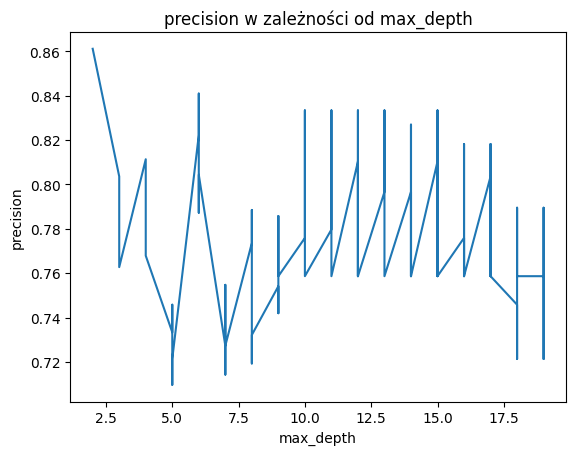

In [53]:
max_depth_value = range(2,20)
min_samples_split_value = range(2,20)
results1 = []

for depth in max_depth_value:
    for split in min_samples_split_value:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred)

        results1.append((depth, split, pre, accuracy))

df_results = pd.DataFrame(results1, columns=["max_depth", "min_samples_split", "precision", "accuracy"])

wykres_pre=plt.plot(df_results['max_depth'],df_results['precision'])
plt.xlabel('max_depth')
plt.ylabel('precision')
plt.title('precision w zależności od max_depth')
plt.show()

#Wnioski do wykresów  
Tak jak podano to w zadaniu wykresy zostały wykonane względem dwóch wartości hiperparametrów, dla  
#RandomForestClassifier:
-n_estimators(liczba estymatorów),
-max_depth_value ,
#DecisionTreeClassifier:
-max_depth_value,
-min_samples_split_value
#Troszkę tłumaczenia
Na wykresach, gdzie porównujmey accurancy widać w jakich "punktach", otrzymujemy największe wartości, dla wykresu RandomForestClassifier, wartości są jak najbardziej poprawne gdyż max osiągają w okolicach wartości średnich dla  obu hiperparametrów, co by sprawdzało teorię, że modele opartę o budowę drzewa osiagaja najlepsze wyniki gdy nie są ani niedouczone ani nie przeuczone.
Natomiast na wykresie DecisionTreeClassifier jest podobnie, tu wartosci największe wysteopują dla "środka" max_depth, ale dla min_samples_split im sie co raz bardziej oddalają tym są mniejsze jest to spowodowane tym, że niski poziom w tym przypadku oznacza możliwosć większej ilości rozgałęzień.
Poza tymi dwoma wykresami zaprezentowałem jeszcze dwa, chciałem pokazać jak dane inne metryki zachowuja się dla hiperparametrów


#Wnioski końcowe
Wyniki za równo z modelu jak i to co pokazują wykresy wydają się być dość standardowe, nie doszło do wycieku danych ani przetrenowania lub nie-dotrenowania modelu, więc narazie można załóżyć, że wszystko jest okej 👍